In [69]:
#Import the dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [70]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [71]:
#Add the latitutides and longitudes to a list.
coordinates = list(lat_lngs)

In [72]:
#Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [73]:
#Create a list that holds the cities we find
cities = []
#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then add it to the list established above for cities
    if city not in cities:
        cities.append(city)
        
#Print the city count to confirm sufficient count
len(cities)

642

In [76]:
#import the requests library
import requests

#import the API key
from config import weather_api_key

In [79]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5bd2a3683a1c4c290c609ecb0bb1120a


In [80]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [81]:
#Create an empty list to hold the weather data.
city_data = []
#Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create the counters
record_count = 1
set_count = 1

#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes 
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    #Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mayumba
Processing Record 2 of Set 1 | kavaratti
Processing Record 3 of Set 1 | grindavik
Processing Record 4 of Set 1 | kurilsk
Processing Record 5 of Set 1 | puerto escondido
Processing Record 6 of Set 1 | yilan
Processing Record 7 of Set 1 | heyang
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 10 of Set 1 | inhambane
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | katsuura
Processing Record 13 of Set 1 | torbay
Processing Record 14 of Set 1 | norman wells
Processing Record 15 of Set 1 | victoria
Processing Record 16 of Set 1 | khatanga
Processing Record 17 of Set 1 | guelph
Processing Record 18 of Set 1 | kieta
Processing Record 19 of Set 1 | pangody
Processing Record 20 of Set 1 | saskylakh
Processing Record 21 of Set 1 | yinchuan
Processing Record 22 of Set 1 | bluff
Processing Record 23

Processing Record 41 of Set 4 | guhagar
Processing Record 42 of Set 4 | necochea
Processing Record 43 of Set 4 | eyl
Processing Record 44 of Set 4 | paamiut
Processing Record 45 of Set 4 | mahebourg
Processing Record 46 of Set 4 | isangel
Processing Record 47 of Set 4 | ewa beach
Processing Record 48 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 49 of Set 4 | burkhala
City not found. Skipping...
Processing Record 50 of Set 4 | paka
Processing Record 1 of Set 5 | dzhusaly
City not found. Skipping...
Processing Record 2 of Set 5 | tateyama
Processing Record 3 of Set 5 | bubaque
Processing Record 4 of Set 5 | port alfred
Processing Record 5 of Set 5 | najran
Processing Record 6 of Set 5 | qaanaaq
Processing Record 7 of Set 5 | sovetskoye
Processing Record 8 of Set 5 | kichha
Processing Record 9 of Set 5 | seddon
Processing Record 10 of Set 5 | goya
Processing Record 11 of Set 5 | mount pleasant
Processing Record 12 of Set 5 | illoqqortoormiut
City not found. Skipping..

Processing Record 33 of Set 8 | heihe
Processing Record 34 of Set 8 | dudinka
Processing Record 35 of Set 8 | pacific grove
Processing Record 36 of Set 8 | ishimbay
Processing Record 37 of Set 8 | oksfjord
Processing Record 38 of Set 8 | moron
Processing Record 39 of Set 8 | martinho campos
Processing Record 40 of Set 8 | lolua
City not found. Skipping...
Processing Record 41 of Set 8 | mount gambier
Processing Record 42 of Set 8 | sistranda
Processing Record 43 of Set 8 | kungalv
Processing Record 44 of Set 8 | dahra
Processing Record 45 of Set 8 | beberibe
Processing Record 46 of Set 8 | turayf
Processing Record 47 of Set 8 | sataua
City not found. Skipping...
Processing Record 48 of Set 8 | oranjemund
Processing Record 49 of Set 8 | gazli
Processing Record 50 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 1 of Set 9 | kidal
Processing Record 2 of Set 9 | caravelas
Processing Record 3 of Set 9 | acapulco
Processing Record 4 of Set 9 | hamilton
Processing Record 5 o

Processing Record 19 of Set 12 | broome
Processing Record 20 of Set 12 | kaseda
Processing Record 21 of Set 12 | turukhansk
Processing Record 22 of Set 12 | kazanka
Processing Record 23 of Set 12 | biak
Processing Record 24 of Set 12 | vila franca do campo
Processing Record 25 of Set 12 | galesong
Processing Record 26 of Set 12 | shihezi
Processing Record 27 of Set 12 | lashio
Processing Record 28 of Set 12 | elizabeth city
Processing Record 29 of Set 12 | palauig
Processing Record 30 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 31 of Set 12 | santiago del estero
Processing Record 32 of Set 12 | henties bay
Processing Record 33 of Set 12 | lodja
Processing Record 34 of Set 12 | katherine
Processing Record 35 of Set 12 | tongren
Processing Record 36 of Set 12 | pio xii
Processing Record 37 of Set 12 | opobo
City not found. Skipping...
Processing Record 38 of Set 12 | atambua
Processing Record 39 of Set 12 | minbu
Processing Record 40 of Set 12 | bairnsdale
Pro

In [82]:
#Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mayumba,-3.4320,10.6554,78.64,88,97,9.53,GA,2021-04-14 23:34:09
1,Kavaratti,10.5669,72.6420,83.43,68,6,2.21,IN,2021-04-14 23:28:21
2,Grindavik,63.8424,-22.4338,42.80,93,75,14.97,IS,2021-04-14 23:38:10
3,Kurilsk,45.2333,147.8833,32.68,69,95,10.76,RU,2021-04-14 23:34:09
4,Puerto Escondido,15.8500,-97.0667,84.20,74,75,5.75,MX,2021-04-14 23:34:10
5,Yilan,24.7570,121.7530,71.01,99,100,0.31,TW,2021-04-14 23:34:10
6,Heyang,26.1011,107.4730,57.04,94,99,0.40,CN,2021-04-14 23:34:10
7,Lebu,-37.6167,-73.6500,56.34,92,66,4.90,CL,2021-04-14 23:35:11
8,Inhambane,-23.8650,35.3833,71.46,78,0,5.75,MZ,2021-04-14 23:34:10
9,Jamestown,42.0970,-79.2353,48.20,43,1,9.22,US,2021-04-14 23:37:51


In [83]:
#create a new column order for the DataFrame
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [85]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mayumba,GA,2021-04-14 23:34:09,-3.4320,10.6554,78.64,88,97,9.53
1,Kavaratti,IN,2021-04-14 23:28:21,10.5669,72.6420,83.43,68,6,2.21
2,Grindavik,IS,2021-04-14 23:38:10,63.8424,-22.4338,42.80,93,75,14.97
3,Kurilsk,RU,2021-04-14 23:34:09,45.2333,147.8833,32.68,69,95,10.76
4,Puerto Escondido,MX,2021-04-14 23:34:10,15.8500,-97.0667,84.20,74,75,5.75
5,Yilan,TW,2021-04-14 23:34:10,24.7570,121.7530,71.01,99,100,0.31
6,Heyang,CN,2021-04-14 23:34:10,26.1011,107.4730,57.04,94,99,0.40
7,Lebu,CL,2021-04-14 23:35:11,-37.6167,-73.6500,56.34,92,66,4.90
8,Inhambane,MZ,2021-04-14 23:34:10,-23.8650,35.3833,71.46,78,0,5.75
9,Jamestown,US,2021-04-14 23:37:51,42.0970,-79.2353,48.20,43,1,9.22


In [89]:
#Create the output file (CSV format).
output_data_file = "weather_data/cities.csv"
#Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [91]:
#Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

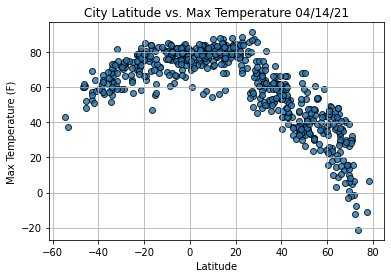

In [92]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

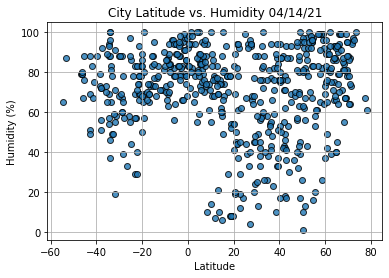

In [93]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

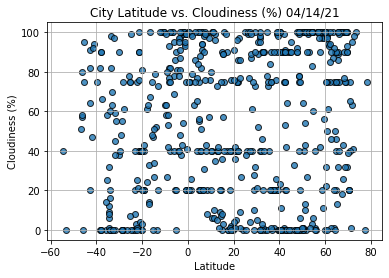

In [94]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

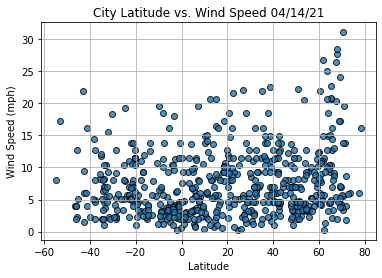

In [95]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [155]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [156]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

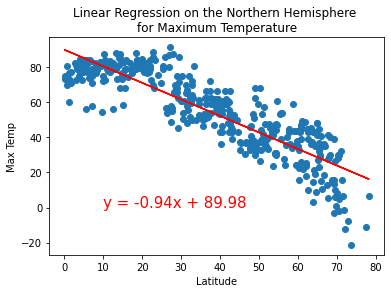

In [157]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,0))

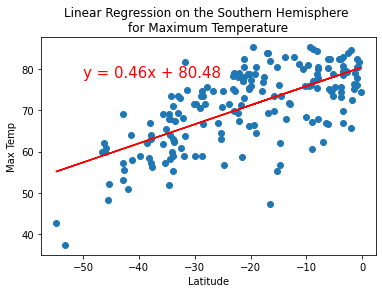

In [160]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,78))

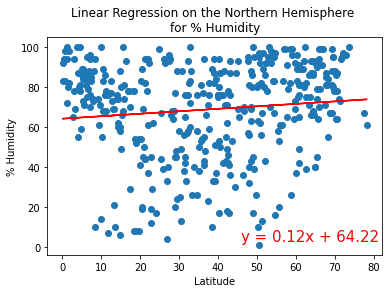

In [161]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(46,3))

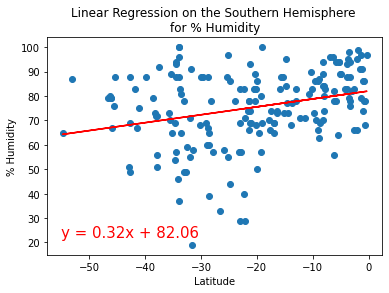

In [162]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-55,22))

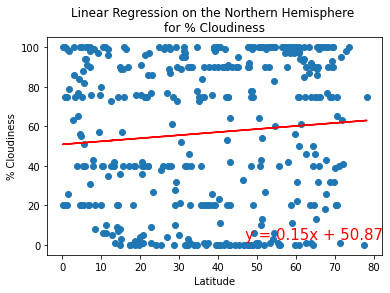

In [164]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(47,3))

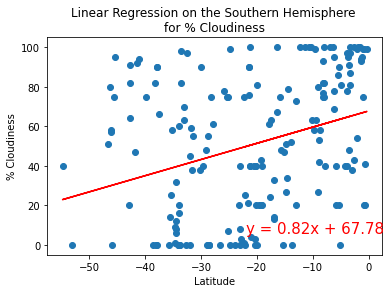

In [191]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-22,6))

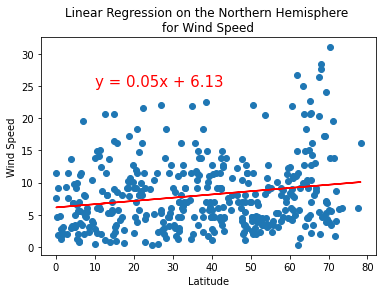

In [195]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(10,25))

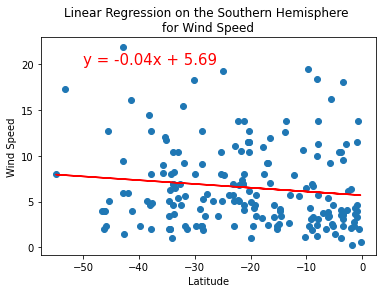

In [198]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,20))